# Data Mining Project - Study of Toxic Release Inventory

## Objective:<br><br> Classifying the samples based on being Carcinogen and <br>Finding which feature contributes to make the toxic-release cancer causing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls "/content/drive/My Drive/basic_data_files.csv"

'/content/drive/My Drive/basic_data_files.csv'


In [ ]:
# Importing necessary modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split

from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import classification_report

import plotly
print('Plotly Version: ',plotly.__version__)

import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)

Plotly Version:  4.4.1


In [ ]:
# Creating the dataframe with only the relevant variables
df = pd.read_csv("/content/drive/My Drive/basic_data_files.csv", 
                 usecols=['YEAR',                          
                          'ST',
                          'FEDERAL_FACILITY',
                          'INDUSTRY_SECTOR',
                          'CLASSIFICATION',
                          'CARCINOGEN',
                          '5.3_WATER'])

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (0,13,15,36,41) have mixed types.Specify dtype option on import or set low_memory=False.



## Cleaing our Dataset

In [ ]:
# First few records of the data
df.head()

,YEAR,ST,FEDERAL_FACILITY,INDUSTRY_SECTOR,CLASSIFICATION,CARCINOGEN,5.3_WATER
0,2016,IN,NO,Fabricated Metals,TRI,NO,0
1,2016,MA,NO,Chemicals,TRI,NO,0
2,2016,OH,NO,Food,TRI,NO,0
3,2016,MA,NO,Miscellaneous Manufacturing,TRI,NO,0
4,2016,GA,NO,Chemicals,TRI,NO,0


In [ ]:
# Dropping the records with the year value we don't need
df.drop(df[df['YEAR'] =='YEAR'].index, inplace = True)
df.drop(df[df['YEAR'] =='Unnamed: 0'].index, inplace = True)
df.YEAR = df.YEAR.astype(int)
df.drop(df[df['YEAR'] < 2011].index, inplace = True)
df.drop(df[df['YEAR'] > 2021].index, inplace = True)

In [ ]:
df.shape

(5051323, 7)

## Pre-Processing the Carcinogen attribute

In [ ]:
# Unique value of Carcinogen in the dataset
df.CARCINOGEN.unique()

array(['NO', 'YES', '1', '0', 1, 0, 3, '2', '3'], dtype=object)

In [ ]:
# Converting all the values in the form of 0(No) and 1(Yes)
df['CARCINOGEN'] = df['CARCINOGEN'].map(
                   {'YES':1 ,'NO':0, '1':1, '0':0, 1:1, 0:0})

In [ ]:
df = df[pd.notnull(df['CARCINOGEN'])]
df = df[pd.notnull(df['YEAR'])]

In [ ]:
df.CARCINOGEN = df.CARCINOGEN.astype(int)

In [ ]:
df.YEAR.unique()

array([2016, 2015, 2014, 2013, 2012, 2011, 2017, 2018, 2019, 2020, 2021])

In [ ]:
df.shape

(984248, 7)

In [ ]:
# Converting the Federal Facility to 0(NO) and 1(YES)
df['FEDERAL_FACILITY'] = df['FEDERAL_FACILITY'].map(
                   {'YES':1 ,'NO':0, '1':1, '0':0, 1:1, 0:0})

In [ ]:
df = df[pd.notnull(df['FEDERAL_FACILITY'])]
df.FEDERAL_FACILITY = df.FEDERAL_FACILITY.astype(int)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# Making the variable name easy to work with
df.rename({'5.3_WATER': 'WATER_RELEASE'}, axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# Converting the Federal Facility to 0(NO) and 1(YES) 
df['WATER_RELEASE'] = df['WATER_RELEASE'].map(
                   {'YES':1 ,'NO':0, '1':1, '0':0, 1:1, 0:0})

In [ ]:
# More downsampling by removing the records
df = df[pd.notnull(df['INDUSTRY_SECTOR'])]
df = df[pd.notnull(df['ST'])]
df = df[pd.notnull(df['CLASSIFICATION'])]
df = df[pd.notnull(df['WATER_RELEASE'])]

df.WATER_RELEASE = df.WATER_RELEASE.astype(int)

In [ ]:
# Categorizing the Classification
df['CLASSIFICATION'] = df['CLASSIFICATION'].map(
                   {'TRI':1 ,'PBT':2, 'Dioxin':3})
df.CLASSIFICATION = df.CLASSIFICATION.astype(int)

In [ ]:
# The dataset to work with
df.head()

,YEAR,ST,FEDERAL_FACILITY,INDUSTRY_SECTOR,CLASSIFICATION,CARCINOGEN,WATER_RELEASE
0,2016,IN,0,Fabricated Metals,1,0,0
1,2016,MA,0,Chemicals,1,0,0
2,2016,OH,0,Food,1,0,0
3,2016,MA,0,Miscellaneous Manufacturing,1,0,0
4,2016,GA,0,Chemicals,1,0,0


## Implementing Classification models

In [ ]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

X=df[['FEDERAL_FACILITY', 'CLASSIFICATION', 'WATER_RELEASE']]  # Features
y=df['CARCINOGEN']  # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

In [ ]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=500)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [ ]:
# Import Xgboost
import xgboost

xg = xgboost.XGBClassifier(n_estimators=500)

#Training the model
xg.fit(X_train,y_train)

y_predxg=xg.predict(X_test)

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_predxg))

Accuracy: 0.7839333338547329


In [ ]:
from xgboost import plot_tree

<Figure size 1440x1440 with 0 Axes>

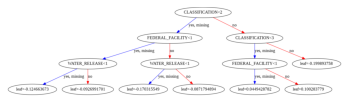

In [ ]:
fig = plt.figure(figsize=(20, 20))
plot_tree(xg)
plt.show()

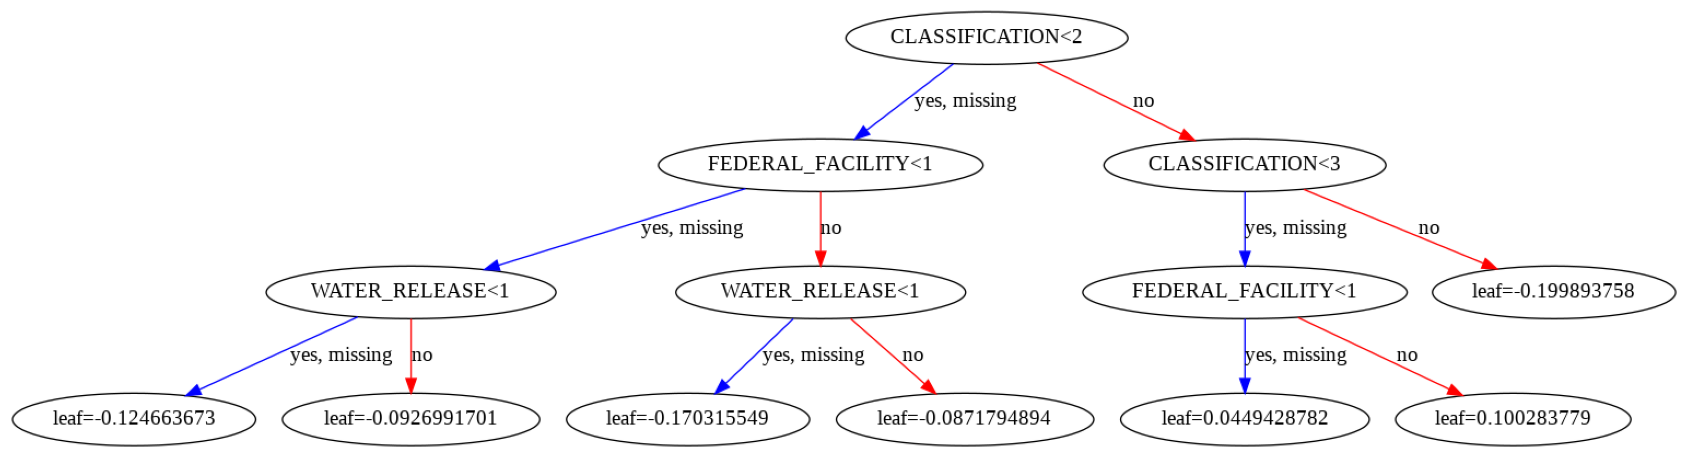

In [ ]:
plot_tree(xg)
fig = plt.gcf()
fig.set_size_inches(30, 15)

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7839333338547329


[0.01622032 0.9804858  0.0032938 ]


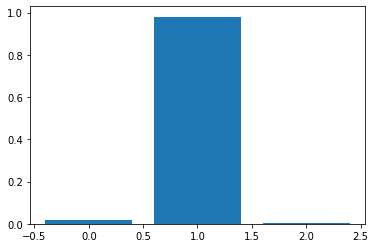

In [ ]:
from matplotlib import pyplot
print(xg.feature_importances_)
# plot
pyplot.bar(range(len(xg.feature_importances_)), xg.feature_importances_)
pyplot.show()

In [ ]:
#(clf.estimators_)

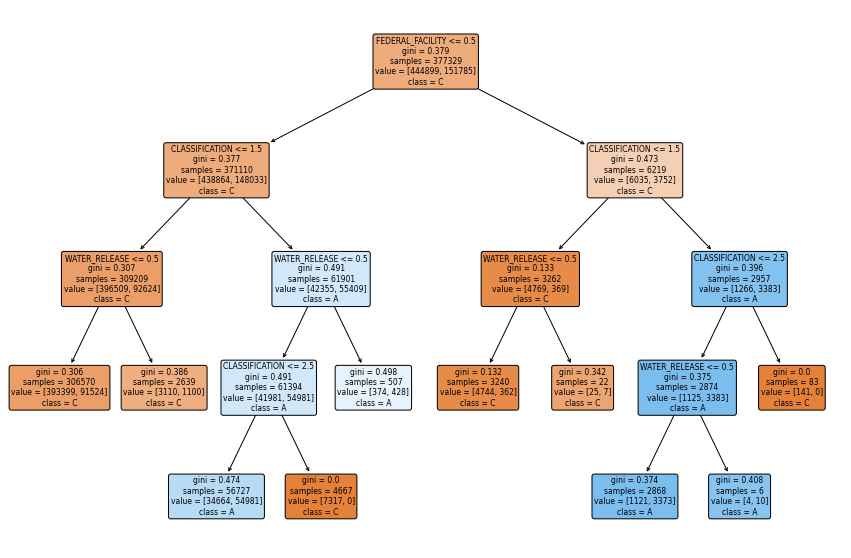

In [ ]:
# Plotting the Random Forest we created earlier
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

fig = plt.figure(figsize=(15, 10))
plot_tree(clf.estimators_[115], 
          feature_names=['FEDERAL_FACILITY', 'CLASSIFICATION', 'WATER_RELEASE'],
          class_names='CARCINOGEN', 
          filled=True, impurity=True, 
          rounded=True);

In [ ]:
# Getting importance
importances = clf.feature_importances_

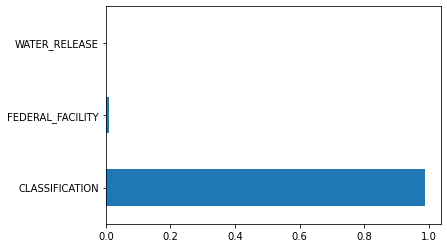

In [ ]:
# plot feature importance
feat_importances = pd.Series(importances, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh');

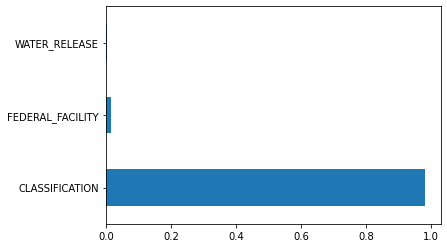

In [ ]:
importances_f = xg.feature_importances_

# plot feature importance
feat_importances = pd.Series(importances_f, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh');

## We conclude that the Water_Release feature is not important to decide if the release is Carcinogenic or not.

### The classification of chemicals based on <br>TRI - Standard TRI Chemical,<br> PBT - Persistent Bioaccumulative Toxic, and<br> Dioxin - Dioxin or Dioxin-like Compound<br> is really important to classify the inventory to Cancerous and Non Cancerous
